In [8]:
import pandas as pd
import numpy as np
from datetime import time
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


[104, 116, 106, 96, 98, 84, 106]
[114, 142, 134, 122, 104, 88, 122]

MONDAY    -- SUCCESS RATE : 91.2% - PROFIT SUM : 23.2 - MAX DRAWDOWN : 2.1%
TUESDAY   -- SUCCESS RATE : 81.7% - PROFIT SUM : -0.3 - MAX DRAWDOWN : 2.1%
WEDNESDAY -- SUCCESS RATE : 79.1% - PROFIT SUM : -10.0 - MAX DRAWDOWN : 2.1%
THURSDAY  -- SUCCESS RATE : 78.7% - PROFIT SUM : -3.7 - MAX DRAWDOWN : 2.1%
FRIDAY    -- SUCCESS RATE : 94.2% - PROFIT SUM : 29.5 - MAX DRAWDOWN : 2.1%
SATURDAY  -- SUCCESS RATE : 95.5% - PROFIT SUM : 30.8 - MAX DRAWDOWN : 2.0%
SUNDAY    -- SUCCESS RATE : 86.9% - PROFIT SUM : 22.3 - MAX DRAWDOWN : 2.1%

TOTAL SUM    -- 91.8
SPECIFIC SUM -- 105.8


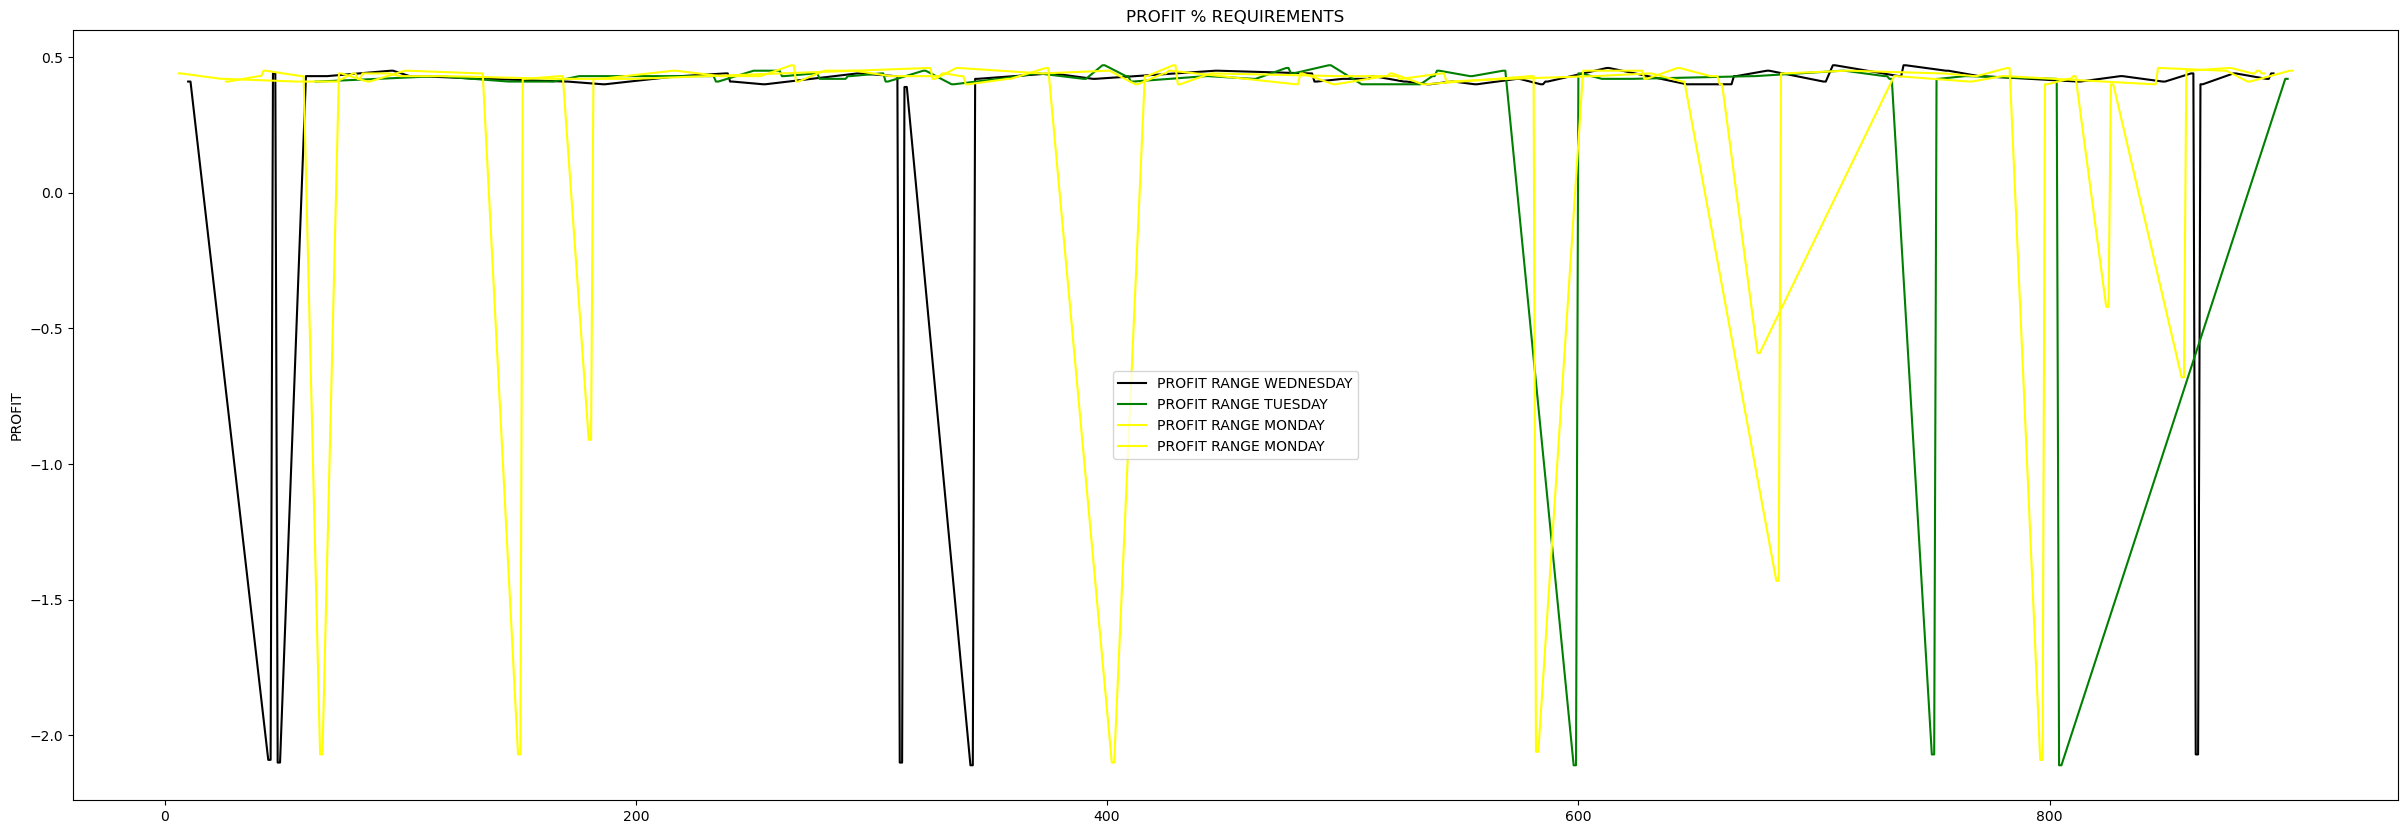

In [25]:


FILES                           = {"FILE_1" : "XRPUSDT -- 0.5TP - 2SL - NON SAFE.csv",           
                                   "FILE_2" : "RLCUSDT -- 0.3TP - 2SL - NON SAFE.csv",                         
                                   "FILE_3" : "ETHUSDT -- 0.3TP - 2SL - NON SAFE.csv",                               
                                   "FILE_4" : "ADAUSDT -- 0.3TP - 2SL - NON SAFE.csv"}                              

COINS = ['XRPUSDT', 'RLCUSDT', 'ETHUSDT', 'ADAUSDT']



#XRPUSDT = 0, 4, 5
#RLCUSDT = 1
#ETHUSDT = 0, 1, 3, 4, 5
#ADAUSDT = 0, 1



    
for j in range(1, 7):
    CHOICE = 1


    COIN = COINS[CHOICE - 1]
    DATES         = [0, 4, 5, 6]
    

    df                                              = SOURCE_DATA(CHOICE, FILES)
    SUCCESS_LIST, TOTAL_LIST, DF_DOW, RATE_LIST, df = FILTERED_DATA_DOW(df)
    DF_ALT                                          = PLOTTING(DF_DOW, DATES)
    SUM, SUM_SPEC                                   = PRINTING(SUCCESS_LIST, TOTAL_LIST, DF_DOW, DATES, RATE_LIST)
    EXPORT(DF_ALT, 'YES', CHOICE, DATES, COIN)


#DF_ALT


In [10]:
def PRINTING(SUCCESS_LIST, TOTAL_LIST, DF_DOW, DATES, RATE_LIST):

    SUM, SUM_SPEC = 0, 0
    
    
    for i in range(len(DF_DOW)):
        SUM = round(SUM + DF_DOW[i]['Profit %'].sum(),1)
        if i in DATES:
            SUM_SPEC = round(SUM_SPEC + DF_DOW[i]['Profit %'].sum(),1)

    print(str(SUCCESS_LIST) + '\n' + str(TOTAL_LIST) + '\n')
    print('MONDAY    -- SUCCESS RATE : ' + str(RATE_LIST[0]) + '% - PROFIT SUM : ' + str(round(DF_DOW[0]['Profit %'].sum(),1)) + ' - MAX DRAWDOWN : ' + str(round(DF_DOW[0]['Drawdown %'].max(),1)) + '%')
    print('TUESDAY   -- SUCCESS RATE : ' + str(RATE_LIST[1]) + '% - PROFIT SUM : ' + str(round(DF_DOW[1]['Profit %'].sum(),1)) + ' - MAX DRAWDOWN : ' + str(round(DF_DOW[1]['Drawdown %'].max(),1)) + '%')
    print('WEDNESDAY -- SUCCESS RATE : ' + str(RATE_LIST[2]) + '% - PROFIT SUM : ' + str(round(DF_DOW[2]['Profit %'].sum(),1)) + ' - MAX DRAWDOWN : ' + str(round(DF_DOW[2]['Drawdown %'].max(),1)) + '%')
    print('THURSDAY  -- SUCCESS RATE : ' + str(RATE_LIST[3]) + '% - PROFIT SUM : ' + str(round(DF_DOW[3]['Profit %'].sum(),1)) + ' - MAX DRAWDOWN : ' + str(round(DF_DOW[3]['Drawdown %'].max(),1)) + '%')
    print('FRIDAY    -- SUCCESS RATE : ' + str(RATE_LIST[4]) + '% - PROFIT SUM : ' + str(round(DF_DOW[4]['Profit %'].sum(),1)) + ' - MAX DRAWDOWN : ' + str(round(DF_DOW[4]['Drawdown %'].max(),1)) + '%')
    print('SATURDAY  -- SUCCESS RATE : ' + str(RATE_LIST[5]) + '% - PROFIT SUM : ' + str(round(DF_DOW[5]['Profit %'].sum(),1)) + ' - MAX DRAWDOWN : ' + str(round(DF_DOW[5]['Drawdown %'].max(),1)) + '%')
    print('SUNDAY    -- SUCCESS RATE : ' + str(RATE_LIST[6]) + '% - PROFIT SUM : ' + str(round(DF_DOW[6]['Profit %'].sum(),1)) + ' - MAX DRAWDOWN : ' + str(round(DF_DOW[6]['Drawdown %'].max(),1)) + '%')
    print('\nTOTAL SUM    -- ' + str(SUM))
    print('SPECIFIC SUM -- ' + str(SUM_SPEC))


    return SUM, SUM_SPEC




In [11]:

def PLOTTING(DF_DOW, DATES):
    
    fig5, (ax6) = plt.subplots(1, sharex=True) 
    fig5.set_figheight(10) 
    fig5.set_figwidth(30) 

    ax6.set_ylabel('PROFIT') 
    ax6.set_title('PROFIT % REQUIREMENTS')

    DF_ALT = DF_DOW[(DATES[0])].append(DF_DOW[(DATES[1])], ignore_index=True)
    ax6.plot(DF_DOW[(DATES[0])]['Profit %'], label='PROFIT RANGE WEDNESDAY', color='black') 
    ax6.plot(DF_DOW[(DATES[1])]['Profit %'], label='PROFIT RANGE TUESDAY',   color='green') 
    
    if len(DATES) > 2:
        for i in range(2, len(DATES)):
            DF_ALT = DF_ALT.append(DF_DOW[(DATES[i])], ignore_index=True)
            ax6.plot(DF_DOW[(DATES[i])]['Profit %'], label='PROFIT RANGE MONDAY',    color='yellow')
    
    plt.legend()
    
    return DF_ALT





In [12]:
def EXPORT(DF_ALT, EXPORT_CHOICE, CHOICE, DATES, COIN):

    if EXPORT_CHOICE == 'YES':
        del DF_ALT['DAY OF WEEK']
        del DF_ALT['DAY NUMBER']
        del DF_ALT['TIME']
        del DF_ALT['TRUE_DATE']
        del DF_ALT['PROFIT_MADE']
        del DF_ALT['TRADE_REF']
        del DF_ALT['TRADE_COUNT']

        ROOT                = (r'/Users/westhomas/Desktop/PYTHON/CRYPTO PROJECT/INPUT FILES/')
        

        DF_ALT.to_csv(ROOT + '/' + '1 HOUR STRATEGY SELECTED DAYS' + str(DATES) + ' - ' + COIN + '.csv')  

    return 


In [13]:
def SOURCE_DATA(CHOICE, FILES):

    ROOT                      = (r'/Users/westhomas/Downloads')
    df                        = pd.read_csv(ROOT + '/' + FILES['FILE_' + str(CHOICE)])
    
    if pd.isna(df.at[0, 'Price USDT']):
        df = df.iloc[2:]

    df = df.sort_values(by="Trade #", ascending=True)
    df = df.reset_index().iloc[:, 1:]
    
    df['Date/Time']       = pd.to_datetime(df['Date/Time']) 
    df['DAY OF WEEK']     = df['Date/Time'].dt.day_name()
    df['DAY NUMBER']      = df['Date/Time'].dt.day_of_week
    df['TIME']            = df['Date/Time'].dt.time
    df['TRUE_DATE']       = df['Date/Time'].dt.date
    
    return df


In [14]:
def FILTERED_DATA_DOW(df):
    
    PROFIT_LIST  = []
    SUCCESS_LIST = []
    TOTAL_LIST   = []
    DF_DOW       = []
    RATE_LIST    = []
    LIST_VALUES  = []
    V            = 1
    
    for i in range(len(df)):
        if df.at[i, 'Profit %'] >= 0:
            PROFIT = 'YES'
        else:
            PROFIT = 'NO'
            
        PROFIT_LIST.append(PROFIT)
        
        if V == 1:
            LIST_VALUES.append(V)
            V = V + 1
        else:
            LIST_VALUES.append(V)
            V = V - 1
            
    df['PROFIT_MADE'] = PROFIT_LIST
    df['TRADE_REF']   = LIST_VALUES
    
    
    
    for k in range(0,7):
        DF_DOW_ITEM                = df[(df["DAY NUMBER"]==k)]
        DF_DOW_ITEM['TRADE_COUNT'] = DF_DOW_ITEM.groupby('Trade #')['Trade #'].transform('count')
        DF_DOW_ITEM                = DF_DOW_ITEM[(DF_DOW_ITEM["TRADE_COUNT"]>1)]
        #DF_DOW_ITEM                = DF_DOW_ITEM[(DF_DOW_ITEM["TRADE_REF"]==1)]
            
        SUCCESS     = DF_DOW_ITEM[(DF_DOW_ITEM["DAY NUMBER"]==k) & (DF_DOW_ITEM["PROFIT_MADE"]=='YES')].count()["PROFIT_MADE"]
        TOTAL       = DF_DOW_ITEM[(DF_DOW_ITEM["DAY NUMBER"]==k)].count()["PROFIT_MADE"]
        
        SUCCESS_LIST.append(SUCCESS)
        TOTAL_LIST.append(TOTAL)
        DF_DOW.append(DF_DOW_ITEM)
    
    for g in range(len(TOTAL_LIST)):
        RATE = round((SUCCESS_LIST[g]/TOTAL_LIST[g])*100,1)
        RATE_LIST.append(RATE)

    
    
    
    
    return SUCCESS_LIST, TOTAL_LIST, DF_DOW, RATE_LIST, df
    
        
    
    